# Iterating through all patients in all years to find peep>5

In [1]:
import pandas as pd
from datetime import datetime
import os
import pickle
from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np
import os

import json

import sys
from scipy.io import loadmat

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
matplotlib.rc( 'savefig', facecolor = 'white' )
from matplotlib import pyplot
import matplotlib.ticker as plticker


import sys
sys.path.append('../') # add this line so Data and data are visible in this file
sys.path.append('../../') # add this line so Data and data are visible in this file
sys.path.append('../PhysioMC/') # add this line so Data and data are visible in this file

# from PatchWand import *
from filters import *
from setting import *
# from preprocessing import *
from ECG_module import *
from dataIO import *
from stage1_PPG_analysis import *

from importlib import reload
%load_ext autoreload
%autoreload 2

In [2]:
%pwd

'/labs/kamaleswaranlab/Sepsis3_062321/mchan_analysis/disparities_O2/repo/stage1_PPG_analysis'

# get PPG data

## os.listdir(inputdir) = 
## ['A071-0512777549',
## 'A063-0482186017',
## 'A113-0520303111', ...]

## os.listdir(inputdir_rec) = 
## ['A058-0502749430_0028d.mat',
##  'A058-0502749430.almth',
##  'A058-0502749430_0013.mat',
##  'A058-0502749430_0013.hea',...]

In [3]:
with open('recording_lookup.json') as json_file:
    recording_lookup = json.load(json_file)


In [4]:

homedir = os.path.expanduser('~')+'/'

# inputdir = homedir+'kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'
# this is where all waveform data are stored
inputdir = '/labs/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/'

# yes
# rec_id = 'A058-0502749430'

# no
# rec_id = 'A030-0497283634'
# rec_id = 'A097-0427935662'
# rec_id = 'A085-0500344504'


# # check the header files in here
# for rec_file in os.listdir(inputdir+rec_id):
#     if 'hea' in rec_file:
#         print(rec_file)

In [5]:
# os.listdir(inputdir)

In [6]:
outputdir = '../../data/stage1/'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)

# get the header file

In [7]:
bbb=['A071-0512777549',
 'A010-0497919330',
 'A095-0512234849',
 'A063-0482186017',
 'A113-0520303111',
 'A014-0504377323',
 'A003-0505762213',]


aaa=['A085-0500344504',
 'A035-0520919680',
 'A119-0519249336',
 'A119-0519250949',
 'A119-0519251070',
 'A029-0498638464',
 'A014-0498537117',
 'A007-0509893729',
 'A031-0511895656',
 'A062-0504919929',
 'A089-0505889210',
 'A089-0507312275',
 'A051-0487285205',
 'A094-0490269036',
 'A011-0499204208',
 'A013-0499280894',
 'A062-0507783304',
 'A062-0507785322',
 'A041-0509673494',
 'A015-0513484963',
 'A026-0516390836',
     
     
 'A107-0522018670',
 'A083-0512964598',
 'A011-0499479646',
 'A011-0499486747',
 'A027-0500449400',
 'A135-0519188371',
 'A143-0519955033',
 'A037-0501879347',
 'A026-0503308009',
 'A008-0519453193',
 'A104-0516533577',
 'A063-0519209708',
 'A050-0488491483',
 'A050-0488491941',
 'A071-0510088247',
 'A085-0483991842',
 'A089-0495999449',
 'A038-0502493277',
 'A038-0502499245',
 'A044-0502593711',
 'A098-0502670958',
 'A077-0502799294',
 'A008-0507442861',
 'A066-0513824835',
 'A111-0515603036',
 'A108-0521588826',
 'A082-0496438106',
 'A034-0498091601',
 'A041-0498095185',
 'A008-0508839415',
 'A044-0509895216',
 'A085-0491158668',
 'A029-0494995976',
 'A102-0496557033',
 'A004-0497652468',
 'A091-0501496081',
 'A038-0505676759',
 'A038-0505678589',
 'A114-0518560157',
 'A101-0521148858',
 'A143-0518065115',
 'A007-0495234892',
 'A059-0512189553',
 'A091-0520428189',
 'A050-0509153052',
 'A067-0491133319',
 'A103-0498019463',
 'A039-0501109158',
 'A077-0514353236',
 'A062-0521946532',
 'A034-0488494488',
 'A082-0489264575',
 'A024-0491205537',
 'A041-0493437604',
 'A008-0505617738',
 'A008-0505617839',
 'A076-0511717115',
 'A065-0515006521',
 'A035-0503443526',
 'A046-0514690386',
 'A109-0515603017',
 'A085-0496788784',
 'A095-0513240009',
 'A008-0488248430',
 'A067-0494106284',
 'A032-0493131183',
 'A075-0499705264',
 'A091-0501892706',
 'A100-0502671112',
 'A092-0509027339',
 'A125-0515603027',
 'A013-0518563375',
 'A130-0517012678',
 'A075-0496277092',
 'A008-0506290560',
 'A095-0514165468',
 'A113-0520075886',
 'A018-0489381131',
 'A069-0495555449']

In [8]:
# os.listdir(inputdir)[100:200]

In [9]:
rec_id = 'A026-0516390836'
header_id = '0004'


In [10]:

# rec_id = list(recording_lookup.keys())[0]

bed_id = rec_id.split('-')[0]
subject_id = rec_id.split('-')[1]

# header_id = recording_lookup[rec_id]
header_name = rec_id+'_{}.hea'.format(header_id)

# get recording directory
inputdir_rec = inputdir + rec_id + '/'
# print(os.listdir(inputdir_rec))


# get header file directory
headerdir = inputdir_rec + header_name
print(headerdir)

# load header file
with open(headerdir, 'r') as f:
    header = f.readlines()

    
header_dict = header_extract(header)
header_dict

/labs/kamaleswaranlab/Sepsis3_062321/Files_cp_sftp_6_30_21/Files_cp_6_30_21/A026-0516390836/A026-0516390836_0004.hea


{'Fs': 240,
 'N_sigs': 8,
 'start_time': '03:40:36.000',
 'date': '21/01/1988',
 'N_samples': 6912000,
 't_dur(hr)': 8.0,
 'unit_dict': {'I': 'mV',
  'II': 'mV',
  'III': 'mV',
  'V': 'mV',
  'AR1': 'mmHg',
  'SPO2': 'a.u.',
  'CO2': 'mmHg',
  'RR': 'a.u.'},
 'gain_dict': {'I': 409.836,
  'II': 409.836,
  'III': 409.836,
  'V': 409.836,
  'AR1': 5.0,
  'SPO2': 200.0,
  'CO2': 4.0,
  'RR': 200.0}}

# choose a sub_id, and choose one of his/her 8hr segments

In [11]:
recording_name = rec_id+'_'+header_id

# outputdir_recording = outputdir+recording_name+'/'
# if not os.path.exists(outputdir_recording):
#     os.makedirs(outputdir_recording)

In [12]:
waveformdir = inputdir+rec_id+'/' +rec_id+'_'+header_id+'.mat'
data = loadmat(waveformdir)['val']


# store the data in dataframe

In [13]:
unit_dict = header_dict['unit_dict']
gain_dict = header_dict['gain_dict']

Fs = header_dict['Fs']

In [14]:
header_dict

{'Fs': 240,
 'N_sigs': 8,
 'start_time': '03:40:36.000',
 'date': '21/01/1988',
 'N_samples': 6912000,
 't_dur(hr)': 8.0,
 'unit_dict': {'I': 'mV',
  'II': 'mV',
  'III': 'mV',
  'V': 'mV',
  'AR1': 'mmHg',
  'SPO2': 'a.u.',
  'CO2': 'mmHg',
  'RR': 'a.u.'},
 'gain_dict': {'I': 409.836,
  'II': 409.836,
  'III': 409.836,
  'V': 409.836,
  'AR1': 5.0,
  'SPO2': 200.0,
  'CO2': 4.0,
  'RR': 200.0}}

In [15]:
raw_dict = {}
# wgain = data_d['wgain'].squeeze()

for i, sig_name in enumerate(gain_dict.keys()):
    raw_dict[sig_name] = data[i, :]/gain_dict[sig_name]

In [16]:
df = pd.DataFrame(raw_dict)
df

,I,II,III,V,AR1,SPO2,CO2,RR
0,-0.04636,-0.09028,-0.05612,0.14396,60.4,4.180,0.0,-0.050
1,-0.04392,-0.08540,-0.06344,0.14396,60.4,4.180,0.0,-0.050
2,-0.04392,-0.09028,-0.08296,0.14152,60.4,4.180,0.0,-0.050
3,-0.03904,-0.10492,-0.11468,0.14396,60.4,4.180,0.0,-0.050
4,-0.03904,-0.13664,-0.15128,0.14640,60.2,4.170,0.0,-0.025
...,...,...,...,...,...,...,...,...
6911995,0.01464,0.18544,0.13420,-0.04392,72.2,4.150,0.0,-1.205
6911996,0.00000,0.17568,0.13664,-0.03416,72.8,4.175,0.0,-1.175
6911997,-0.02440,0.16836,0.15616,-0.01464,73.4,4.205,0.0,-1.175
6911998,-0.03416,0.16592,0.17568,0.00000,74.6,4.205,0.0,-1.175


In [17]:
t_arr = np.arange(df.shape[0])/Fs

df['time'] = t_arr
df['time'] = df['time']-df['time'].values[0]

t_dur = df.shape[0]/Fs
print('t_dur: {:.2f}s'.format(t_dur))

t_dur: 28800.00s


# prepare something for plot_sync function

In [18]:
plotted_sigs = list(unit_dict.keys())

for sig_name in plotted_sigs:
    
    if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
        sig_title = 'ECG (lead {})'.format(sig_name)+ '\n({})'.format(unit_dict[sig_name])
    elif 'RR' == sig_name:
        sig_title = 'RR'+ '\n({})'.format('a.u.')
    elif 'SPO2' == sig_name:
        sig_title = 'PPG'+ '\n({})'.format('a.u.')
    elif 'AR1' == sig_name:
        sig_title = 'AR1'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CVP3' == sig_name:
        sig_title = 'CVP3'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CO2' == sig_name:
        sig_title = 'CO2'+ '\n({})'.format(unit_dict[sig_name])
    else:
        sig_title = 'a.u.'
        
    print(sig_name, sig_title)

I ECG (lead I)
(mV)
II ECG (lead II)
(mV)
III ECG (lead III)
(mV)
V ECG (lead V)
(mV)
AR1 AR1
(mmHg)
SPO2 PPG
(a.u.)
CO2 CO2
(mmHg)
RR RR
(a.u.)


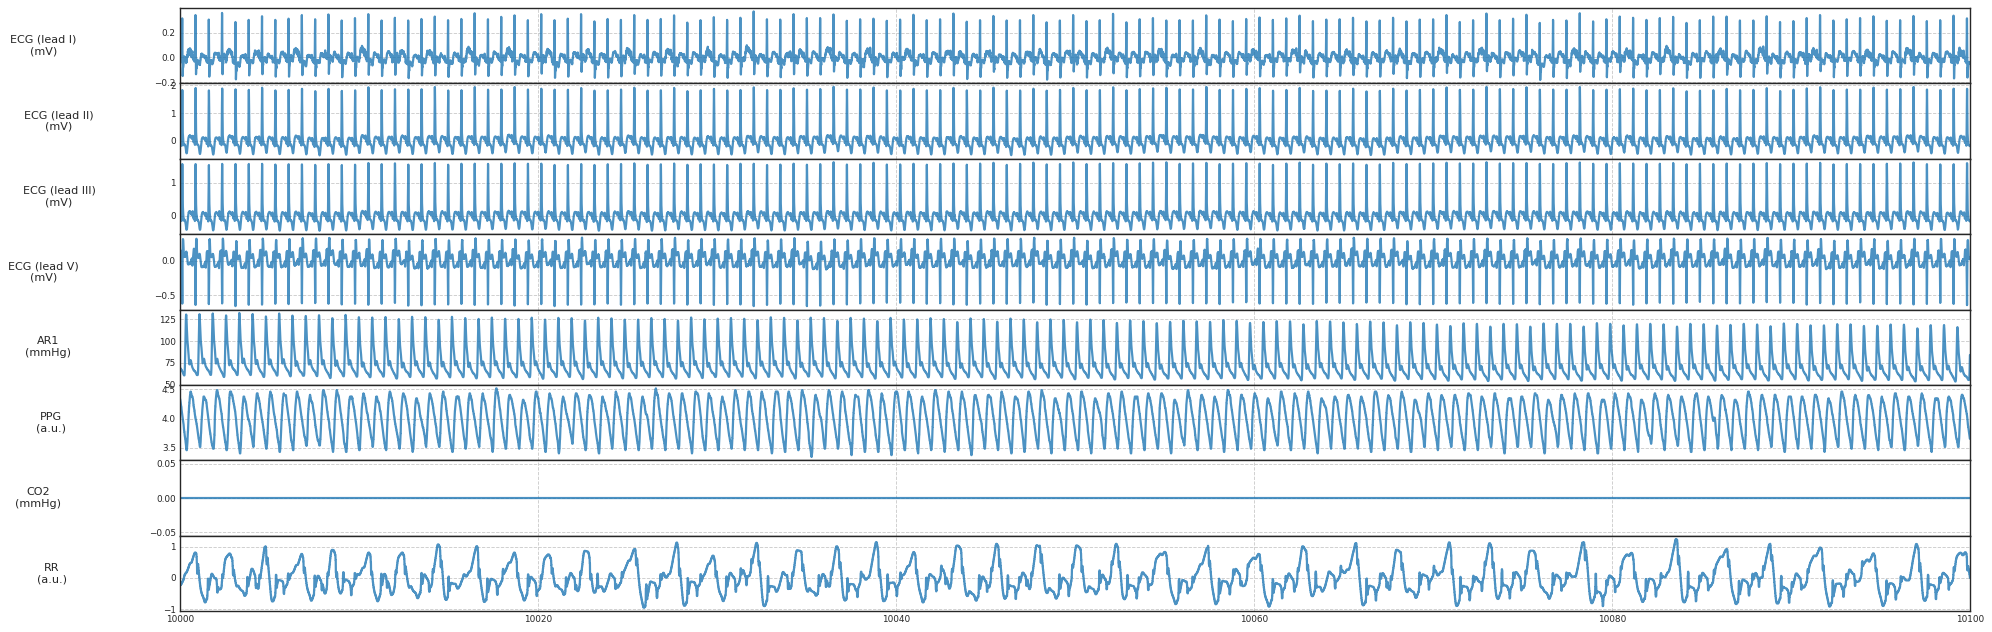

In [19]:
plot_all_sync(df, subject_id, plotted_sigs, unit_dict, t_start=10000, t_end=10100, fig_name=None, outputdir=None, show_plot=True)


In [20]:
print('"{}": "{}",'.format(rec_id, header_id))



"A026-0516390836": "0004",


In [21]:
sys.exit()

SystemExit: 

/opt/rh/rh-python38/root/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3348: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:

# # rec_id = list(recording_lookup.keys())[0]


# bed_id = rec_id.split('-')[0]
# subject_id = rec_id.split('-')[1]

# # header_id = recording_lookup[rec_id]
# header_name = rec_id+'_{}.hea'.format(header_id)

# # get recording directory
# inputdir_rec = inputdir + rec_id + '/'

# # get header file directory
# headerdir = inputdir_rec + header_name
# print(headerdir)


# # load header file
# with open(headerdir, 'r') as f:
#     header = f.readlines()


In [ ]:
# come back to this later
## need top 

In [ ]:
for rec_folder in os.listdir(inputdir):
    sys.exit()
    if rec_folder[0]!='A':
        continue
        
    inputdir_rec = inputdir + rec_folder + '/'

    # for rec_file in os.listdir(inputdir+rec_folder):
    
    try: 
        with open(inputdir_rec+rec_folder+'.hea', 'r') as f:
            header = f.readlines()

        header_dict = header_extract(header)
    except:
        print('{}.hea not in the folder'.format(rec_folder))

In [ ]:
# def header_extract(header):
#     Fs = int(header[0].split(' ')[2])
#     N_sigs = int(header[0].split(' ')[1])
#     start_time = header[0].split(' ')[4]
#     date =  header[0].split(' ')[5] # TODO: check if this is birthday
#     N_samples = int(header[0].split(' ')[3])
#     t_dur = N_samples/Fs/60/60 # hr
    
    
#     # for h in header:
#     #     if len(h.split(' '))>2:
#     #         continue
#     #     if 
#     #     print(h)
    
#     header_dict = {
#     'Fs': Fs,
#     'N_sigs': N_sigs,
#     'start_time': start_time,
#     'date': date,
#     'N_samples': N_samples,
#     't_dur': t_dur,
#     }
#     return header_dict

# get some meta data (sampling rate, number of signals, absolute start time)

In [ ]:
Fs = int(header[0].split(' ')[2])
N_sigs = int(header[0].split(' ')[1])
start_time = header[0].split(' ')[4]
N_samples = int(header[0].split(' ')[3])
t_dur = N_samples/Fs/60/60 # hr

In [ ]:
Fs, N_sigs, start_time, N_samples, t_dur

In [ ]:
# start_time

# datetime_object = datetime.strptime(start_time, '%b %d %Y %I:%M%p')
# datetime_object

# get raw waveform data

In [ ]:
for rec_file in os.listdir(inputdir+rec_id):
    if 'mat' in rec_file:
        print(rec_file)

In [ ]:
for rec_file in os.listdir(inputdir+rec_id):
    if 'd.mat' in rec_file:
        if '0nd.mat' in rec_file:
            continue
        # print(sub_file)
        keep_file = rec_file

In [ ]:
rec_file

# choose a sub_id, and choose one of his/her 8hr segments

In [ ]:
# keep_file = sub_id+'_0001d.mat'
keep_file = rec_id+'_0004d.mat' # 0004d has all info, 0004 only has waveforms (matrix)

# sub_id

In [ ]:
file_d_name = keep_file

file_d_dir = inputdir_rec+file_d_name

data_d = loadmat(file_d_dir)
print(data_d['wlabel'])
wlabel = data_d['wlabel']

sig_names = []
for label in wlabel:
    sig_names.append(label.split(' ')[0])

data_d

In [ ]:
unit_dict = {}
for i, sig_name in enumerate(sig_names):
    unit_dict[sig_name] = data_d['wuom'][i].split(' ')[0]
    
unit_dict

In [ ]:
file_name = file_d_name.replace("d.mat", ".mat")
# file_name = 'A071-0512777549_0000.mat'

file_dir = inputdir_rec+file_name

data = loadmat(file_dir)['val']


In [ ]:
# data.shape, wgain.squeeze()

# store the data in dataframe

In [ ]:
raw_dict = {}
wgain = data_d['wgain'].squeeze()

for i, sig_name in enumerate(sig_names):
    raw_dict[sig_name] = data[i, :]/wgain[i]

In [ ]:

df = pd.DataFrame(raw_dict)

In [ ]:
df

In [ ]:
t_arr = np.arange(df.shape[0])/Fs

df['time'] = t_arr
df['time'] = df['time']-df['time'].values[0]

t_dur = df.shape[0]/Fs
print('t_dur: {:.2f}s'.format(t_dur))

In [ ]:
# '{}'.format(unit_dict[sig_name])

In [ ]:
# plotted_sigs
# sig_name.split(' ')[0]

In [ ]:
plotted_sigs = sig_names

In [ ]:
for sig_name in plotted_sigs:
    
    if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
        sig_title = 'ECG (lead {})'.format(sig_name)+ '\n({})'.format(unit_dict[sig_name])
    elif 'RR' == sig_name:
        sig_title = 'RR'+ '\n({})'.format('a.u.')
    elif 'SPO2' == sig_name:
        sig_title = 'PPG'+ '\n({})'.format('a.u.')
    elif 'AR1' == sig_name:
        sig_title = 'AR1'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CVP3' == sig_name:
        sig_title = 'CVP3'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CO2' == sig_name:
        sig_title = 'CO2'+ '\n({})'.format(unit_dict[sig_name])
    else:
        sig_title = 'a.u.'
        
    print(sig_name, sig_title)

In [ ]:
# def plot_all_sync(df_sub, subject_id, plt_scale=0.3, plotted_sigs=None, fig_name=None, outputdir=None, show_plot=False):

# if plotted_sigs is None:
#     plotted_sigs = PLOTTED_SIGS

#     subject_id = df['subject_id'].unique()[0]

t_start = 500
t_end = 700

df_seg = df[(df['time']>=t_start) & (df['time']<=t_end)].copy()

t_arr = df_seg['time'].values
#     t_arr = t_arr - t_arr[0]

t_start = t_arr[0]
t_end = t_arr[-1]

t_dur = t_arr[-1] - t_arr[0]
plt_scale = 0.5

fig, axes = plt.subplots(len(plotted_sigs), 1, figsize=(25,len(plotted_sigs)), gridspec_kw = {'wspace':0, 'hspace':0}, dpi=80)

# TODO: make a plot dict
fontsize = 20*plt_scale
linewidth = 2
alpha = 0.8

for i, ax in enumerate(axes):
    # condition grid
    ax.grid('on', linestyle='--')
    # no x ticks except for the bottom ax
    if i<len(axes)-1:
        ax.set_xticklabels([])
    # add y ticks to all axes
    ax.tick_params(axis='y', which='both', labelsize=20)

    sig_name = plotted_sigs[i]
    sig_plt = df_seg[sig_name].values

    # if sig_name in sync_color_dict.keys():
    #     color = color_dict[sync_color_dict[sig_name]]
    # else:
    #     color = random_colors[i]
    ax.plot(t_arr, sig_plt, alpha=alpha ,zorder=1, linewidth=linewidth)
    ax.set_xlim(t_start, t_end) # remove the weird white space at the beg and end of the plot


#     # remove some borders (top and right)
#     ax.spines['right'].set_visible(False)
#     if i==0:
#         ax.spines['top'].set_visible(False)

#     # add y label, indicate their unit
    if 'I' == sig_name or 'II' == sig_name or 'III' == sig_name or 'V' == sig_name:
        sig_title = 'ECG (lead {})'.format(sig_name)+ '\n({})'.format(unit_dict[sig_name])
    elif 'RR' == sig_name:
        sig_title = 'RR'+ '\n({})'.format('a.u.')
    elif 'SPO2' == sig_name:
        sig_title = 'PPG'+ '\n({})'.format('a.u.')
    elif 'AR1' == sig_name:
        sig_title = 'AR1'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CVP3' == sig_name:
        sig_title = 'CVP3'+ '\n({})'.format(unit_dict[sig_name])
    elif 'CO2' == sig_name:
        sig_title = 'CO2'+ '\n({})'.format(unit_dict[sig_name])
    else:
        sig_title = 'a.u.'
        


    ax.set_ylabel(sig_title, fontsize=fontsize,rotation = 0,  va='center', ha='center',  labelpad=100)

    # set tick font size
    ax.tick_params(axis='both', which='major', labelsize=fontsize*0.8)

plt.show()
    # set a hard limit on the range of the signals
    # ylim_hard = False
    # if ylim_hard:
    #     if 'ECG' in sig_name:
    #         ax.set_ylim(-2, 2)    
    #     if 'ppg' in sig_name:
    #         ax.set_ylim(-500, 500)
    #     if 'accel' in sig_name:
    #         ax.set_ylim(-2, 2)
    #     if 'cosmed' in sig_name:
    #         ax.set_ylim(label_range_dict[sig_name.split('_')[0]])
    # if 'OUES' in sig_name:
    #     ax.set_ylim(0, 0.1)

#     # do this so there's no weird white space on top and bottom of each ax
#     y_min, y_max = ax.get_ylim()
#     ax.set_ylim(y_min, y_max)



#     # add color to each segment of all signal to indicate the task
#     inspect_labels(ax, df, y_min, y_max, annotate=i==0)

#     loc = plticker.MultipleLocator(base=600) # this locator puts ticks at regular intervals
#     ax.xaxis.set_major_locator(loc)

# ax.set_xlabel('time (sec)', fontsize=fontsize)
# fig.subplots_adjust(wspace=0, hspace=0)

# if outputdir is not None:
#     if not os.path.exists(outputdir):
#         os.makedirs(outputdir)
#     if fig_name is None:
#         fig_name = 'All_sub{}'.format(subject_id)
#     else:
#         fig_name = fig_name + '_sub{}'.format(subject_id)

#     fig.savefig(outputdir + fig_name,bbox_inches='tight', transparent=False)

# if show_plot == False:
#     plt.close(fig)
#     pyplot.close(fig)
#     plt.close('all')

In [ ]:
# QRS_detector_dict

In [ ]:
sig_name = 'I'
ECG = df_seg[sig_name].values

fig_name = 'ECG_diagnostics_'+sig_name
QRS_detector_dict = task_HR_detector(ECG, Fs, fig_name=fig_name, outputdir=None, show_plot=True)
       
t_ecg = np.arange(ECG.shape[0])/Fs
hr_interp = np.interp(t_ecg, QRS_detector_dict['ts_hr'], QRS_detector_dict['hr'])
